In [0]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [0]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


From the above, possible values of target are 0,1,2.
Below gives the meaning 0,1,2

In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

So, i want to explore how many points are 0 , 1 and 2.(See below)

In [0]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


From the above results, 0-50 is setosa, 50-100 is versicolor and 100-150 is virginica

So from target column i want to add another column named 'flower_name'.
See elow.

In [0]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Now we try do to do some visualization stuff!

In [0]:
from matplotlib import pyplot as plt

In [0]:
%matplotlib inline

Now, i want to separate the species into 3 separate data frames!

In [0]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [0]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


Lets draw a scatter plot for the first 2 features 

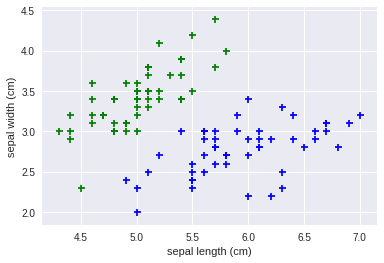

In [0]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='+')

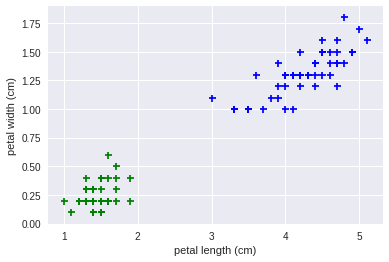

In [0]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='+')

In [0]:
##So, lets train our model using Sklearn!

In [0]:
from sklearn.model_selection import train_test_split # To split your dataset into training and testing datasets!

In [0]:
X = df.drop(['target','flower_name'],axis = 'columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
y = df.target
y

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [0]:
len(X_train)


In [0]:
len(X_test)

In [0]:
#Create a SVM classifier
from sklearn.svm import SVC
#model = SVC()
model = SVC(kernel='linear') # Use the parameters to tune your model!

In the Output u can see the different parameters!

In [0]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)